# Bank Customer Churn Prediction using Tree-based Methods

It is believed that tree-based methods routinely outperform neural networks. Lets find out if tree-based methods give us better accuracy/precision in analyzing our customer churn dataset.

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Loading data

In [37]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9754,9755,15572114,Shih,673,Spain,Male,40,1,121629.22,1,1,1,3258.60,0
7171,7172,15744273,Waterhouse,637,Germany,Male,30,6,122641.56,2,1,0,65618.01,0
7912,7913,15652169,Buckley,642,France,Male,35,2,133161.95,1,0,1,122254.86,0
6274,6275,15661275,Wynn,532,Germany,Male,52,3,110791.97,1,1,0,148704.77,1
639,640,15798398,Pagnotto,785,France,Female,36,4,135438.40,1,0,0,190627.01,0


In [38]:
df.shape
#So we have 10k customer records and 14 dimensinos

(10000, 14)

In [39]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [40]:
# Run a few describe() calls to explore columns. But more efficient way is using unique(), done in next cell
# df['Exited'].describe() # This is the target column containing churn status
# df['EstimatedSalary'].describe()
# df['CreditScore'].describe()

In [41]:
# Find out nature of values in each column so that we can eliminate unnecessary cols and figure out further preprocessing
for col in df:
    print(f'{col}: {df[col].unique()}') 

RowNumber: [    1     2     3 ...  9998  9999 10000]
CustomerId: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 7

Above results show us that there are a few columns that can be removed. There are a few categorical columns that will need to be encoded for subsequent analysis.

In [42]:
# Drop columns that wont be used for analysis
df1= df.drop(['RowNumber','CustomerId','Surname'],axis=1)


In [43]:
df1.shape
# We have 10k customer records and 11 dimensions. Will drop Exited column later as its target column
# So in the end there will be 10 useful dimensions

(10000, 11)

We have to check for null/NaN values and take steps if they are found.

In [44]:
# Check for null values in each column
null_columns = df1.columns[df1.isnull().any()]
null_columns

# If there are null values, print out the column names
if null_columns.empty:
    print("No null values in any column.")
else:
    print("Null values found in the following columns:")
    print(null_columns.tolist())

No null values in any column.


No null values, so preprocessing to tackle them is not necessary.

### Data viz to explore churn patterns

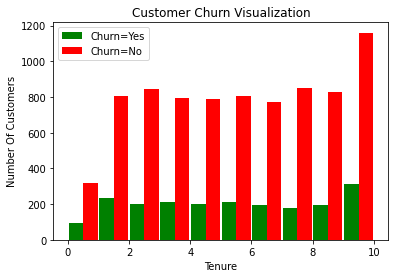

In [45]:
tenure_churn_no = df1[df1.Exited==0].Tenure
tenure_churn_yes = df1[df1.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Visualization")

# Plot histogram of customer churn as a function of the tenure (i.e. no of years they have been a customer of the bank)
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

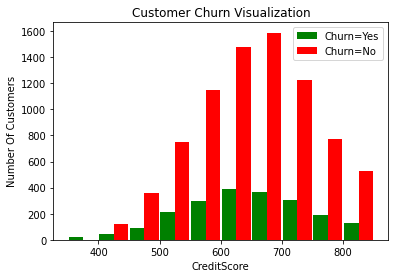

In [46]:
CreditScore_no = df1[df1.Exited==0].CreditScore      
CreditScore_yes = df1[df1.Exited==1].CreditScore      


plt.xlabel("CreditScore")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Visualization")

# Plot histogram of customer churn as a function of the customer credit scores
plt.hist([CreditScore_yes, CreditScore_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


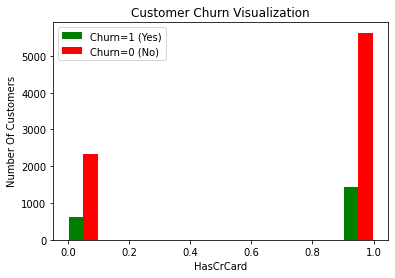

In [47]:
HasCrCard_no = df1[df1.Exited==0].HasCrCard      
HasCrCard_yes = df1[df1.Exited==1].HasCrCard      


plt.xlabel("HasCrCard")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Visualization")

# Plot histogram of customer churn as a function of the customer credit scores
plt.hist([HasCrCard_yes, HasCrCard_no], rwidth=0.95, color=['green','red'],label=['Churn=1 (Yes)','Churn=0 (No)'])
plt.legend()


### Tackling Categorical Variables

In [48]:
# Identify which cols have categorical values by printing list of unique values in each column
for col in df1:
    print(col,':', df1[col].unique()) 

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

Above result shows us that Geography, Gender, HasCrCard and IsActiveMember are categorical variables.
Exited is also categorical (target variable). We will drop it later.

In [49]:
# Need to replace Female and Male with 0 and 1
# We dont need a new col for this so using inplace=true param will update the existing DF col itself
df1['Gender'].replace({'Female':1,'Male':0},inplace=True)
df1.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1
6,822,France,0,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1
8,501,France,0,44,4,142051.07,2,0,1,74940.50,0
9,684,France,0,27,2,134603.88,1,1,1,71725.73,0


Geography will need one hot encoding as it is not binary and not ordinal.

In [50]:
df2 = pd.get_dummies(data=df1, columns=['Geography'])
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [51]:
df2.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### **Create training and test sets**

Create the training and test datasets. We will perform feature scaling & handle class imbalance after this to prevent data leakage.


In [52]:
# Create train and test datasets

X = df2.drop('Exited',axis='columns')
y = df2['Exited']
# Use stratified sampling for representative distribution of churned and not churned customers as per original dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=df2['Exited'])

There is no need for feature scaling in tree-based algorithms because they are not sensitive to variance in data.

### Class imbalance check & address

In [53]:
# Check distribution in target column (training data)
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [54]:
# Find out percentage diff between no. of 0 records and no. of 1 records
print(100*6370/(6370+1630) -100*1630/(6370+1630))

59.25


Downsampling might lead to 59% reduction in amount of data which is a lot. Lets opt for oversampling.

In [55]:
# Checking versions of imblearn and sklearn owing to bug in imblearn. 
# pip show imbalanced-learn 
# pip show scikit-learn

Bug in imblearn addressed by keeping import statement in separate cell and actual usage of oversampling class in separate cell.

In [56]:
from imblearn.over_sampling import ADASYN

In [57]:
# ADASYN (Adaptive Synthetic algorithm) oversampling

print('Before')
print(y_train.value_counts())

# Oversampling the training dataset only to prevent data leakage
ada= ADASYN (random_state=130)
X_train_ada, y_train_ada= ada.fit_resample(X_train, y_train)

print('After')
print(y_train_ada.value_counts())

Before
0    6370
1    1630
Name: Exited, dtype: int64
After
1    6396
0    6370
Name: Exited, dtype: int64


In [58]:
print(X_train_ada.columns)
print(len(X_train_ada.columns)) # No. of columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')
12


In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
# SMOTE oversampling

print('Before')
print(y_train.value_counts())

# Oversampling the training dataset only to prevent data leakage
smt= SMOTE (random_state=130)
X_train_smt, y_train_smt= smt.fit_resample(X_train, y_train)

print('After')
print(y_train_smt.value_counts())

Before
0    6370
1    1630
Name: Exited, dtype: int64
After
0    6370
1    6370
Name: Exited, dtype: int64


In [61]:
print(X_train_smt.shape)
print(y_train_smt.shape)

(12740, 12)
(12740,)


### Build tree-based models

In [62]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


We will first try without correcting class imbalance (X_train, y_train)

In [63]:
# Instantiate models
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost_model = XGBClassifier(n_estimators=100, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit models
adaboost_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Make predictions
adaboost_pred = adaboost_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
xgboost_pred = xgboost_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)

# Evaluate models
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
xgboost_accuracy = accuracy_score(y_test, xgboost_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_pred)

print ('Without correcting class imbalance, model performance:')
print('AdaBoost Accuracy:', adaboost_accuracy)
print('Random Forest Accuracy:', random_forest_accuracy)
print('XGBoost Accuracy:', xgboost_accuracy)
print('Decision Tree Accuracy:', decision_tree_accuracy)
print('Gradient Boosting Accuracy:', gradient_boosting_accuracy)

Without correcting class imbalance, model performance:
AdaBoost Accuracy: 0.857
Random Forest Accuracy: 0.869
XGBoost Accuracy: 0.864
Decision Tree Accuracy: 0.8025
Gradient Boosting Accuracy: 0.868


Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91      1593
           1       0.73      0.47      0.57       407

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.80      0.48      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.49      0.60       407

    accuracy                           0.86      2000
   macro av

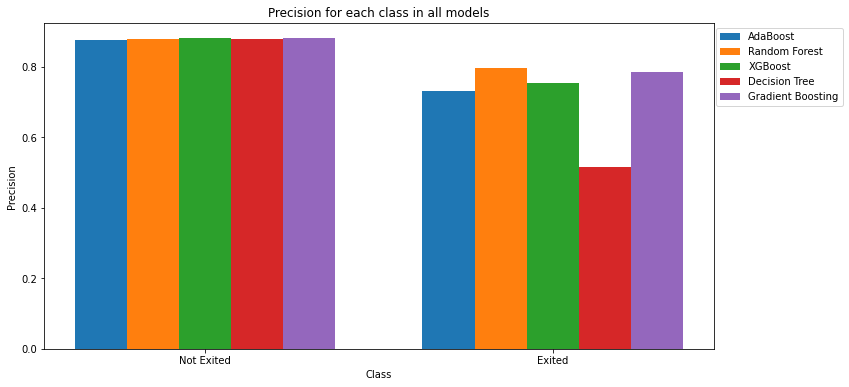

In [64]:
# Lets generate classification reports for each model 
from sklearn.metrics import classification_report

# Generate classification reports
adaboost_report = classification_report(y_test, adaboost_pred)
random_forest_report = classification_report(y_test, random_forest_pred)
xgboost_report = classification_report(y_test, xgboost_pred)
decision_tree_report = classification_report(y_test, decision_tree_pred)
gradient_boosting_report = classification_report(y_test, gradient_boosting_pred)


# Print classification reports
print('Classification Report for AdaBoost:\n', adaboost_report)
print('\nClassification Report for Random Forest:\n', random_forest_report)
print('\nClassification Report for XGBoost:\n', xgboost_report)
print('\nClassification Report for Decision Tree:\n', decision_tree_report)
print('\nClassification Report for Gradient Boosting:\n', gradient_boosting_report)


# Classification reports can be tough to read for so many models. 
# So lets just plot the precision values for each class using the values found by classification_report

# Calculate classification reports for each model
classification_reports = {}
models = ['AdaBoost', 'Random Forest', 'XGBoost', 'Decision Tree', 'Gradient Boosting']

for model_name, y_pred in zip(models, [adaboost_pred, random_forest_pred, xgboost_pred, decision_tree_pred, gradient_boosting_pred]):
    classification_reports[model_name] = classification_report(y_test, y_pred, output_dict=True)

# Extract precision values for each class in each model
precision_values = {}
for model_name in models:
    precision_values[model_name] = [classification_reports[model_name]['0']['precision'], classification_reports[model_name]['1']['precision']]

# Plot precision values for each class in a single chart
bar_width = 0.15
index = np.arange(len(precision_values[models[0]]))

plt.figure(figsize=(12, 6))

for i, model_name in enumerate(models):
    plt.bar(index + i * bar_width, precision_values[model_name], bar_width, label=model_name)

plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for each class in all models')
plt.xticks(index + bar_width * (len(models) - 1) / 2, ['Not Exited', 'Exited'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2,1)) # bbox_To_anchor to prevent overlap of legend with bars
plt.show()

In [65]:
# Get ROC AUC score for each model
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC scores
adaboost_roc_auc = roc_auc_score(y_test, adaboost_pred)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_pred)
xgboost_roc_auc = roc_auc_score(y_test, xgboost_pred)
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_pred)
gradient_boosting_roc_auc = roc_auc_score(y_test, gradient_boosting_pred)

# Print ROC AUC scores
print('ROC AUC Score for AdaBoost:', round(adaboost_roc_auc,3))
print('ROC AUC Score for Random Forest:', round(random_forest_roc_auc,3))
print('ROC AUC Score for XGBoost:', round(xgboost_roc_auc,3))
print('ROC AUC Score for Decision Tree:', round(decision_tree_roc_auc,3))
print('ROC AUC Score for Gradient Boosting:', round(gradient_boosting_roc_auc,3))

ROC AUC Score for AdaBoost: 0.714
ROC AUC Score for Random Forest: 0.724
ROC AUC Score for XGBoost: 0.725
ROC AUC Score for Decision Tree: 0.701
ROC AUC Score for Gradient Boosting: 0.725


Now lets try after using SMOTE to address class imbalance.

In [66]:
# Using SMOTE training datasets
# Instantiate models
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost_model = XGBClassifier(n_estimators=100, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit models
adaboost_model.fit(X_train_smt, y_train_smt)
random_forest_model.fit(X_train_smt, y_train_smt)
xgboost_model.fit(X_train_smt, y_train_smt)
decision_tree_model.fit(X_train_smt, y_train_smt)
gradient_boosting_model.fit(X_train_smt, y_train_smt)

# Make predictions
adaboost_pred = adaboost_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
xgboost_pred = xgboost_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)

# Evaluate models
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
xgboost_accuracy = accuracy_score(y_test, xgboost_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_pred)

print ('After correcting class imbalance (oversampling), model performance:')
print('AdaBoost Accuracy:', adaboost_accuracy)
print('Random Forest Accuracy:', random_forest_accuracy)
print('XGBoost Accuracy:', xgboost_accuracy)
print('Decision Tree Accuracy:', decision_tree_accuracy)
print('Gradient Boosting Accuracy:', gradient_boosting_accuracy)

After correcting class imbalance (oversampling), model performance:
AdaBoost Accuracy: 0.8295
Random Forest Accuracy: 0.8455
XGBoost Accuracy: 0.8495
Decision Tree Accuracy: 0.7775
Gradient Boosting Accuracy: 0.8455


Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1593
           1       0.57      0.68      0.62       407

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      1593
           1       0.62      0.60      0.61       407

    accuracy                           0.85      2000
   macro avg       0.76      0.75      0.76      2000
weighted avg       0.84      0.85      0.84      2000


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      1593
           1       0.63      0.62      0.63       407

    accuracy                           0.85      2000
   macro av

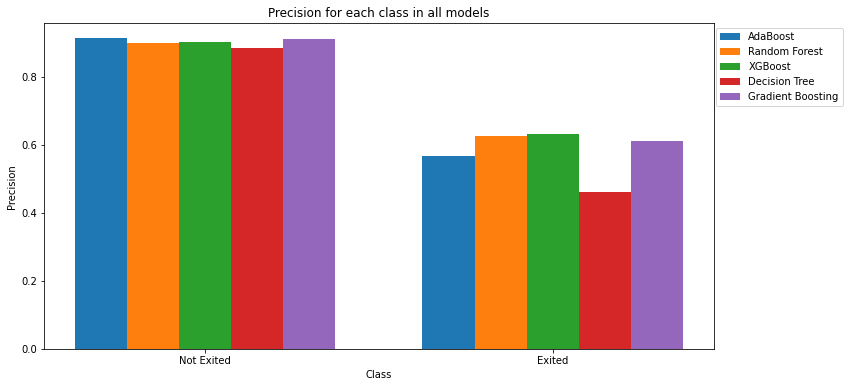

In [67]:

# Lets see classification reports for each model 
from sklearn.metrics import classification_report

# Generate classification reports
adaboost_report = classification_report(y_test, adaboost_pred)
random_forest_report = classification_report(y_test, random_forest_pred)
xgboost_report = classification_report(y_test, xgboost_pred)
decision_tree_report = classification_report(y_test, decision_tree_pred)
gradient_boosting_report = classification_report(y_test, gradient_boosting_pred)

# Print classification reports
print('Classification Report for AdaBoost:\n', adaboost_report)
print('\nClassification Report for Random Forest:\n', random_forest_report)
print('\nClassification Report for XGBoost:\n', xgboost_report)
print('\nClassification Report for Decision Tree:\n', decision_tree_report)
print('\nClassification Report for Gradient Boosting:\n', gradient_boosting_report)



# Classification reports can be tough to read for so many models. 
# So lets just plot the precision values for each class using the values found by classification_report

# Calculate classification reports for each model
classification_reports = {}
models = ['AdaBoost', 'Random Forest', 'XGBoost', 'Decision Tree', 'Gradient Boosting']

for model_name, y_pred in zip(models, [adaboost_pred, random_forest_pred, xgboost_pred, decision_tree_pred, gradient_boosting_pred]):
    classification_reports[model_name] = classification_report(y_test, y_pred, output_dict=True)

# Extract precision values for each class in each model
precision_values = {}
for model_name in models:
    precision_values[model_name] = [classification_reports[model_name]['0']['precision'], classification_reports[model_name]['1']['precision']]

# Plot precision values for each class in a single chart
bar_width = 0.15
index = np.arange(len(precision_values[models[0]]))

plt.figure(figsize=(12, 6))

for i, model_name in enumerate(models):
    plt.bar(index + i * bar_width, precision_values[model_name], bar_width, label=model_name)

plt.xlabel('Class')
plt.ylabel('Precision')
plt.title('Precision for each class in all models')
plt.xticks(index + bar_width * (len(models) - 1) / 2, ['Not Exited', 'Exited'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2,1)) # bbox_To_anchor to prevent overlap of legend with bars
plt.show()

In [68]:
# Get ROC AUC score for each model
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC scores
adaboost_roc_auc = roc_auc_score(y_test, adaboost_pred)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_pred)
xgboost_roc_auc = roc_auc_score(y_test, xgboost_pred)
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_pred)
gradient_boosting_roc_auc = roc_auc_score(y_test, gradient_boosting_pred)

# Print ROC AUC scores
print('ROC AUC Score for AdaBoost:', round(adaboost_roc_auc,3))
print('ROC AUC Score for Random Forest:', round(random_forest_roc_auc,3))
print('ROC AUC Score for XGBoost:', round(xgboost_roc_auc,3))
print('ROC AUC Score for Decision Tree:', round(decision_tree_roc_auc,3))
print('ROC AUC Score for Gradient Boosting:', round(gradient_boosting_roc_auc,3))

ROC AUC Score for AdaBoost: 0.774
ROC AUC Score for Random Forest: 0.755
ROC AUC Score for XGBoost: 0.764
ROC AUC Score for Decision Tree: 0.701
ROC AUC Score for Gradient Boosting: 0.775


So we can see from the precision charts that there is much higher precision for class 1 (i.e. Exited=1, i.e. churn=yes) using tree-based methods (avg accuracy is about 0.7) compared to what we obtained in our Neural network (0.5).
Notably there is a slight decrease in accuracy after performing oversampling, both via tree-based and NN approaches.
